In [37]:
import pandas as pd, numpy as np, os
from scipy import stats
from pathlib import Path

os.chdir(Path())

survey_data = pd.read_csv('survey_data.csv')
qb_stats = pd.read_csv('qb_stats.csv', index_col='name')

In [16]:
qb_stats.select_dtypes(include=[np.number]).agg([np.mean, np.std]) #1A and 1B


,games,att,cmp,comp_pct,yds,ypa,td,int,sack,loss,rating
mean,14.125000,478.406250,306.562500,64.296875,3515.062500,7.375000,22.375000,10.343750,32.312500,217.093750,93.387500
std,2.406309,110.360366,68.929575,3.627537,852.437489,0.796768,6.256609,5.839849,10.514008,70.786075,11.054725


<AxesSubplot: ylabel='Frequency'>

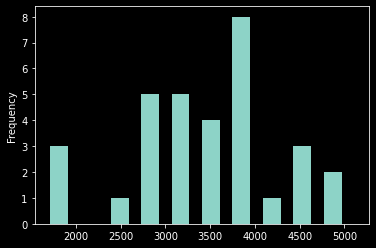

In [25]:
qb_stats['yds'].plot(kind='hist', width=200) #1C

,team,games,att,cmp,comp_pct,yds,ypa,td,int,sack,loss,rating
name,,,,,,,,,,,,
Joe Flacco,DEN,8.0,262.0,171.0,65.3,1822.0,7.0,6.0,5.0,26.0,194.0,85.1


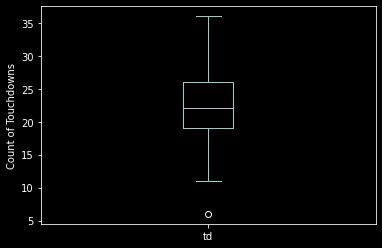

In [45]:
qb_box = qb_stats['td'].plot(kind='box', ylabel='Count of Touchdowns') #1D
td_iqr = stats.iqr(qb_stats['td'])
lower_bound = np.quantile(qb_stats['td'],0.25) - 1.5 * td_iqr
upper_bound = np.quantile(qb_stats['td'], 0.75) + 1.5 * td_iqr
outliers = qb_stats.query(f'td > {upper_bound} or td < {lower_bound}')
display(outliers)

In [55]:
brown_hair_prob = len(survey_data.query('hair_color == "brown"'))/len(survey_data['hair_color']) #2A
blue_eyes_prob = len(survey_data.query('eye_color == "blue"'))/len(survey_data['eye_color']) #2B
blue_eyes_and_brown_hair_prob = brown_hair_prob * blue_eyes_prob
eyes_given_hair_prob = blue_eyes_prob * blue_eyes_and_brown_hair_prob / brown_hair_prob#2C
hair_given_eyes_prob = brown_hair_prob * blue_eyes_and_brown_hair_prob / blue_eyes_prob #2D
print(f'''Brown Hair Prob: {brown_hair_prob}
Blue Eyes Prob: {blue_eyes_prob}
Blue Eyes given Brown Hair Prob: {eyes_given_hair_prob}
Brown Hair given Blue Eyes Prob: {hair_given_eyes_prob}''')

Brown Hair Prob: 0.5123456790123457
Blue Eyes Prob: 0.24691358024691357
Blue Eyes given Brown Hair Prob: 0.06096631611034902
Brown Hair given Blue Eyes Prob: 0.2624980948026216


2E) Since the probability of the outcomes differ based on the conditional variable, we can assume that the traits are somewhat dependent on each other (this is genetically the case at least)

<AxesSubplot: xlabel='Hair Color', ylabel='Count of Color'>

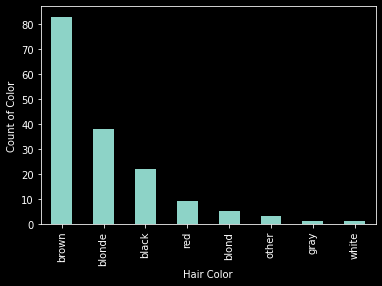

In [65]:
survey_data['hair_color'].value_counts().plot(kind='bar', ylabel='Count of Color', xlabel='Hair Color')

<AxesSubplot: xlabel='Eye Color', ylabel='Count of Color'>

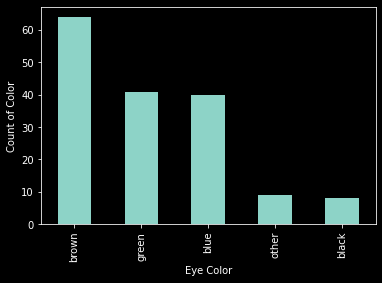

In [64]:
survey_data['eye_color'].value_counts().plot(kind='bar', ylabel='Count of Color', xlabel='Eye Color')